In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

In [3]:
warnings.simplefilter("ignore")
np.random.seed(1)

In [4]:
def AR1(x0,phi,T):
    xtm1 = x0
    x_list = [x0]
    for i in range(T):
        e = np.random.normal(size=1)
        xt = phi*xtm1 + e
        xtm1 = xt
        x_list.append(np.asscalar(xt))
        
    return x_list

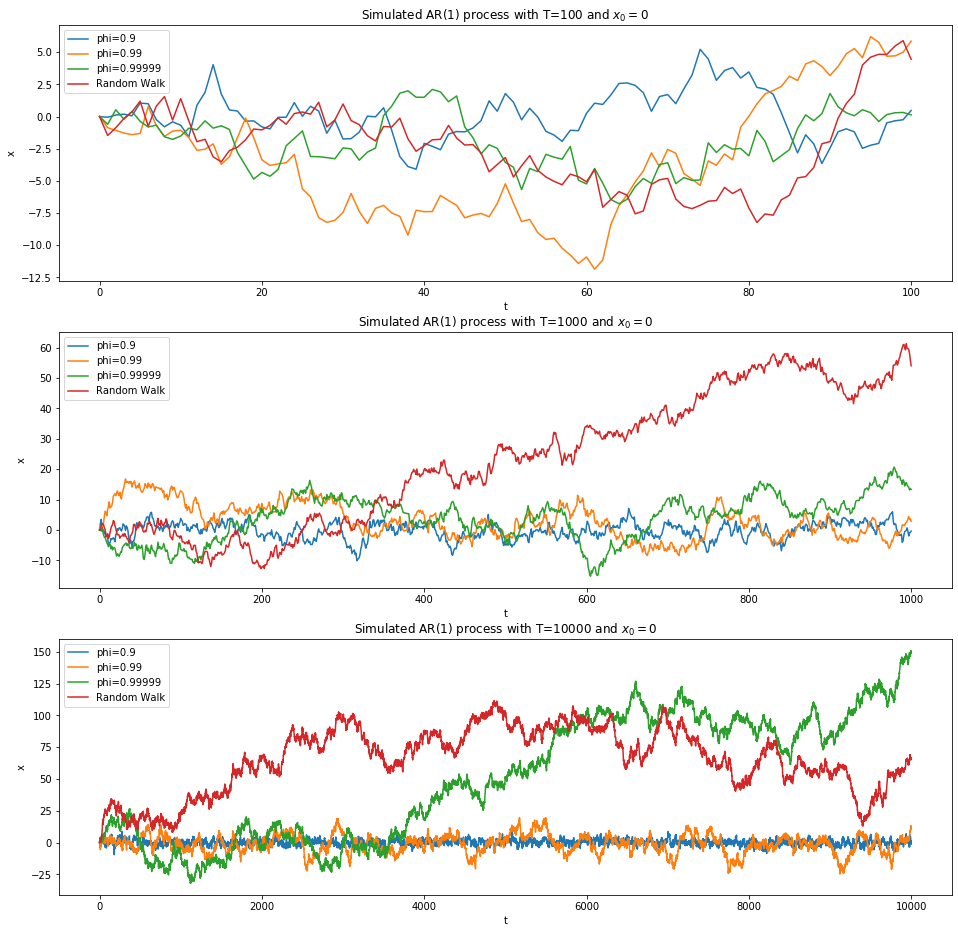

T             100                                    
phi       0.90000     0.99000     0.99999     1.00000
count  101.000000  101.000000  101.000000  101.000000
mean     0.080105   -3.402994   -1.997149   -2.380646
std      1.853378    4.705239    2.201931    3.285539
min     -4.091228  -11.858954   -6.772519   -8.228788
25%     -1.180035   -7.377084   -3.560329   -4.911447
50%     -0.045520   -3.675235   -2.191582   -2.113917
75%      1.081365   -0.822022   -0.207448   -0.272908
max      5.219756    6.202793    2.104469    5.895170

T             1000                                       
phi        0.90000      0.99000      0.99999      1.00000
count  1001.000000  1001.000000  1001.000000  1001.000000
mean     -0.239045     3.078539     3.740006    22.802793
std       2.676213     5.632865     7.175765    21.766964
min     -10.123483    -8.433248   -15.196676   -12.710606
25%      -1.825692    -1.435849    -1.342033     1.338257
50%       0.040697     2.579801     5.096716    23.339940
75%       1.642244     6.809012     8.722240    43.746355
max       7.055486    16.799304    20.713622    61.337640

T             10000                                          
phi         0.90000       0.99000       0.99999       1.00000
count  10001.000000  10001.000000  10001.000000  10001.000000
mean       0.112595     -1.369322     51.036790     65.469213
std        2.271898      7.198976     48.433191     25.103234
min       -9.562255    -24.773753    -31.941692      0.000000
25%       -1.418489     -5.677731      4.548994     51.722705
50%        0.155405     -0.921549     52.091298     68.095186
75%        1.602754      3.362623     95.992070     86.280261
max        8.822666     19.621463    150.959589    111.693097

,Population Mean,Population Standard Deviation
phi,,
0.90000,0,2.294157
0.99000,0,7.088812
0.99999,0,223.607357
1.00000,0,NaN


In [8]:
phi_list = [0.9, 0.99, 0.99999, 1]
T_list = [100, 1000, 10000]
pop_mean = 0
pop_std = [np.sqrt(1/(1-phi**2)) for phi in phi_list[:-1]] + [np.nan]
ts_data = []
for T in T_list:
    for phi in phi_list:
        xl = AR1(0, phi, T)
        ts_data.append(xl)
index = pd.MultiIndex.from_product([T_list, phi_list], names=["T", "phi"])
df = pd.DataFrame(data=ts_data, index=index)
data100, data1000, data10000 = (df.query('T == {}'.format(T)).T.dropna() for T in T_list)
data_list = [data100, data1000, data10000]

fig, axes = plt.subplots(3,1,figsize=(16,16))
axes = axes.ravel()
for i, data in enumerate(data_list):
    t = data.index.values
    x1, x2, x3, x4 = (data.iloc[:, data.columns.get_level_values(1)==phi].values for phi in phi_list)
    axes[i].plot(t, x1, label="phi=0.9")
    axes[i].plot(t, x2, label="phi=0.99")
    axes[i].plot(t, x3, label="phi=0.99999")
    axes[i].plot(t, x4, label="Random Walk")
    axes[i].set_xlabel('t')
    axes[i].set_ylabel('x')
    axes[i].set_title("Simulated AR(1) process with T={} and ".format(T_list[i]) + r'$x_0=0$')
    axes[i].legend(loc="best")
    
plt.show()
for data in data_list:
    display(data.describe())
    
df_pop = pd.DataFrame(data={"Population Mean": [0,0,0,0],
                            "Population Standard Deviation": pop_std}, index = phi_list)
df_pop.index.name = "phi"
display(df_pop)

From the above tables, we can see when phi equaled 0.9, the sample mean and standard deviation converge to the population mean and standard deviation when sample size increased. When phi is getting close to 1, the sample mean and standard deviation diverge from the population mean and stardard deviation, and the process behaved like a random walk process.